In [1]:
import os

In [2]:
location = {'SSD': '/home/caio/Documentos/COVID-19/ZINC_38.chemflow',
        'HDD': '/home/caio/secundario/ZINC_38.chemflow'}

In [3]:
try:
    max_proc = os.cpu_count()
except:
    max_proc = 1

In [4]:
import math

In [5]:
nsteps = int(math.log(max_proc, 2)) + 1 # geometric progression

In [6]:
import subprocess

In [7]:
def get_results(out):
    fps_list = []    # files per second
    t = ''    # time
    out = out.split(b'\r')
    
    for i in out:
        afps = i.rfind(b',')
        ifps = i.rfind(b'files/s')
        if afps > -1 and ifps > -1:
            fps = i[afps+1:ifps].decode('ascii').strip()
            try:
                fps = float(fps)
                fps_list.append(fps)
            except ValueError: 
                pass
    try:
        fps = sum(fps_list)/len(fps_list)
    except ZeroDivisionError:
        fps = 0

    at = out[-2].rfind(b'[')
    it = out[-2].rfind(b'<')
    t = out[-2][at+1:it]
    t = t.decode('ascii').strip()

    return fps, t

In [8]:
def get_results_list(nsteps, location):
    results_list = []
    ncores = 1
    for i in range(nsteps):
        for storage, path in location.items():
            for read in ['Line', 'File']:
                if read == 'Line':
                    out = subprocess.run(f'python home/caio/COVID-19/DockFlow_base/DockFlow_collect_vina.py '\
                        f'--project {path} --protocol qvina --overwrite --ncores {ncores} --readline ', 
                        stdout=subprocess.PIPE, stderr=subprocess.STDOUT, shell=True).stdout
                else:
                    out = subprocess.run(f'python home/caio/COVID-19/DockFlow_base/DockFlow_collect_vina.py '\
                            f'--project {path} --protocol qvina --overwrite --ncores {ncores}', 
                            stdout=subprocess.PIPE, stderr=subprocess.STDOUT, shell=True).stdout

                fps, t = get_results(out)
                results_list.append({'Number of Cores': ncores, 'Storage': storage, 
                    'Read': read, 'Files/s': fps, 'Time': t})
                
        ncores = ncores*2
    return results_list

In [9]:
import pandas as pd

In [10]:
results_list = get_results_list(nsteps, location)

In [10]:
# df = pd.DataFrame(results_list)
df = pd.read_csv('times-pcollect_vina.csv')
df

,Number of Cores,Storage,Read,Files/s,Time
0,1,SSD,Line,3371.871786,00:28
1,1,SSD,File,12196.930976,00:08
2,1,HDD,Line,38.650622,42:57
3,1,HDD,File,61.339661,27:05
4,2,SSD,Line,4378.176129,00:22
5,2,SSD,File,11040.622889,00:09
6,2,HDD,Line,63.217797,26:17
7,2,HDD,File,63.219389,26:16
8,4,SSD,Line,10626.850000,00:09
9,4,SSD,File,10629.791711,00:08


In [12]:
df.to_csv('times-pcollect_vina.csv',index=False)

In [4]:
import seaborn as sns

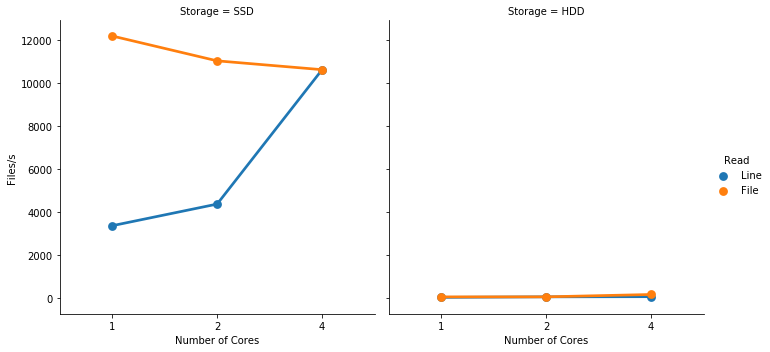

In [5]:
sns.catplot(data=df,x='Number of Cores',y='Files/s',col='Storage',hue='Read',kind='point')

In [21]:
df['Time in seconds'] = df['Time'].apply(lambda x: int(x[:2]) * 60 + int(x[3:]))

In [22]:
df

,Number of Cores,Storage,Read,Files/s,Time,Time in seconds
0,1,SSD,Line,3371.871786,00:28,28
1,1,SSD,File,12196.930976,00:08,8
2,1,HDD,Line,38.650622,42:57,2577
3,1,HDD,File,61.339661,27:05,1625
4,2,SSD,Line,4378.176129,00:22,22
5,2,SSD,File,11040.622889,00:09,9
6,2,HDD,Line,63.217797,26:17,1577
7,2,HDD,File,63.219389,26:16,1576
8,4,SSD,Line,10626.850000,00:09,9
9,4,SSD,File,10629.791711,00:08,8


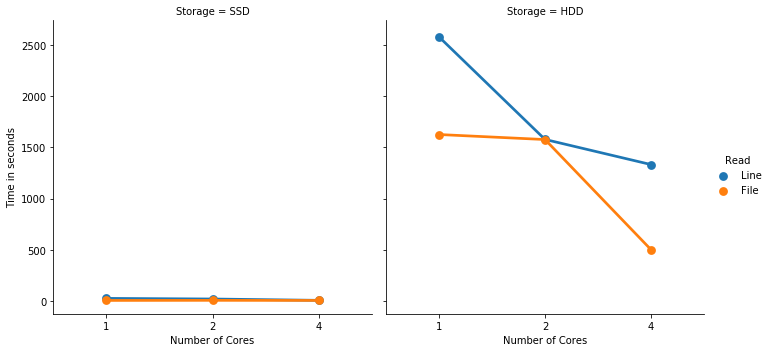

In [23]:
sns.catplot(data=df,x='Number of Cores',y='Time in seconds',col='Storage',hue='Read',kind='point')